<a href="https://colab.research.google.com/github/Tejss-16/Data-Science/blob/main/Telecom_churn_prediction/Telecom_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 Data Preparation

**Data Collection**

In [ ]:

import pandas as pd
import numpy as np

df = pd.read_csv('telecom_churn_dataset.csv')

print("First 5 rows:")
print(df.head(10))

print("\nSummary:")
print(df.info(10))

print("\nMissing values:")
print(df.isnull().sum())


First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service          

**Cleaning dataset**

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df.drop('customerID', axis=1, inplace=True)
print("Remaining missing values:")
print(df.isnull().sum())


Remaining missing values:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


**label encoding**

In [ ]:
# Convert 'Churn' column to binary: Yes -> 1, No -> 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, drop_first=True)
print(df.head())


   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           False  ...                            Fa

**spliting dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Split into input (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



X_train: (5625, 30)
X_test: (1407, 30)
y_train: (5625,)
y_test: (1407,)


# Task 2 Exploratory Data Analysis (EDA)


https://colab.research.google.com/drive/1qza7E2jpii8mKWBUu0lQb8vKgveiTL0K#scrollTo=qK-AIF2Gm9_Q&line=1&uniqifier=1

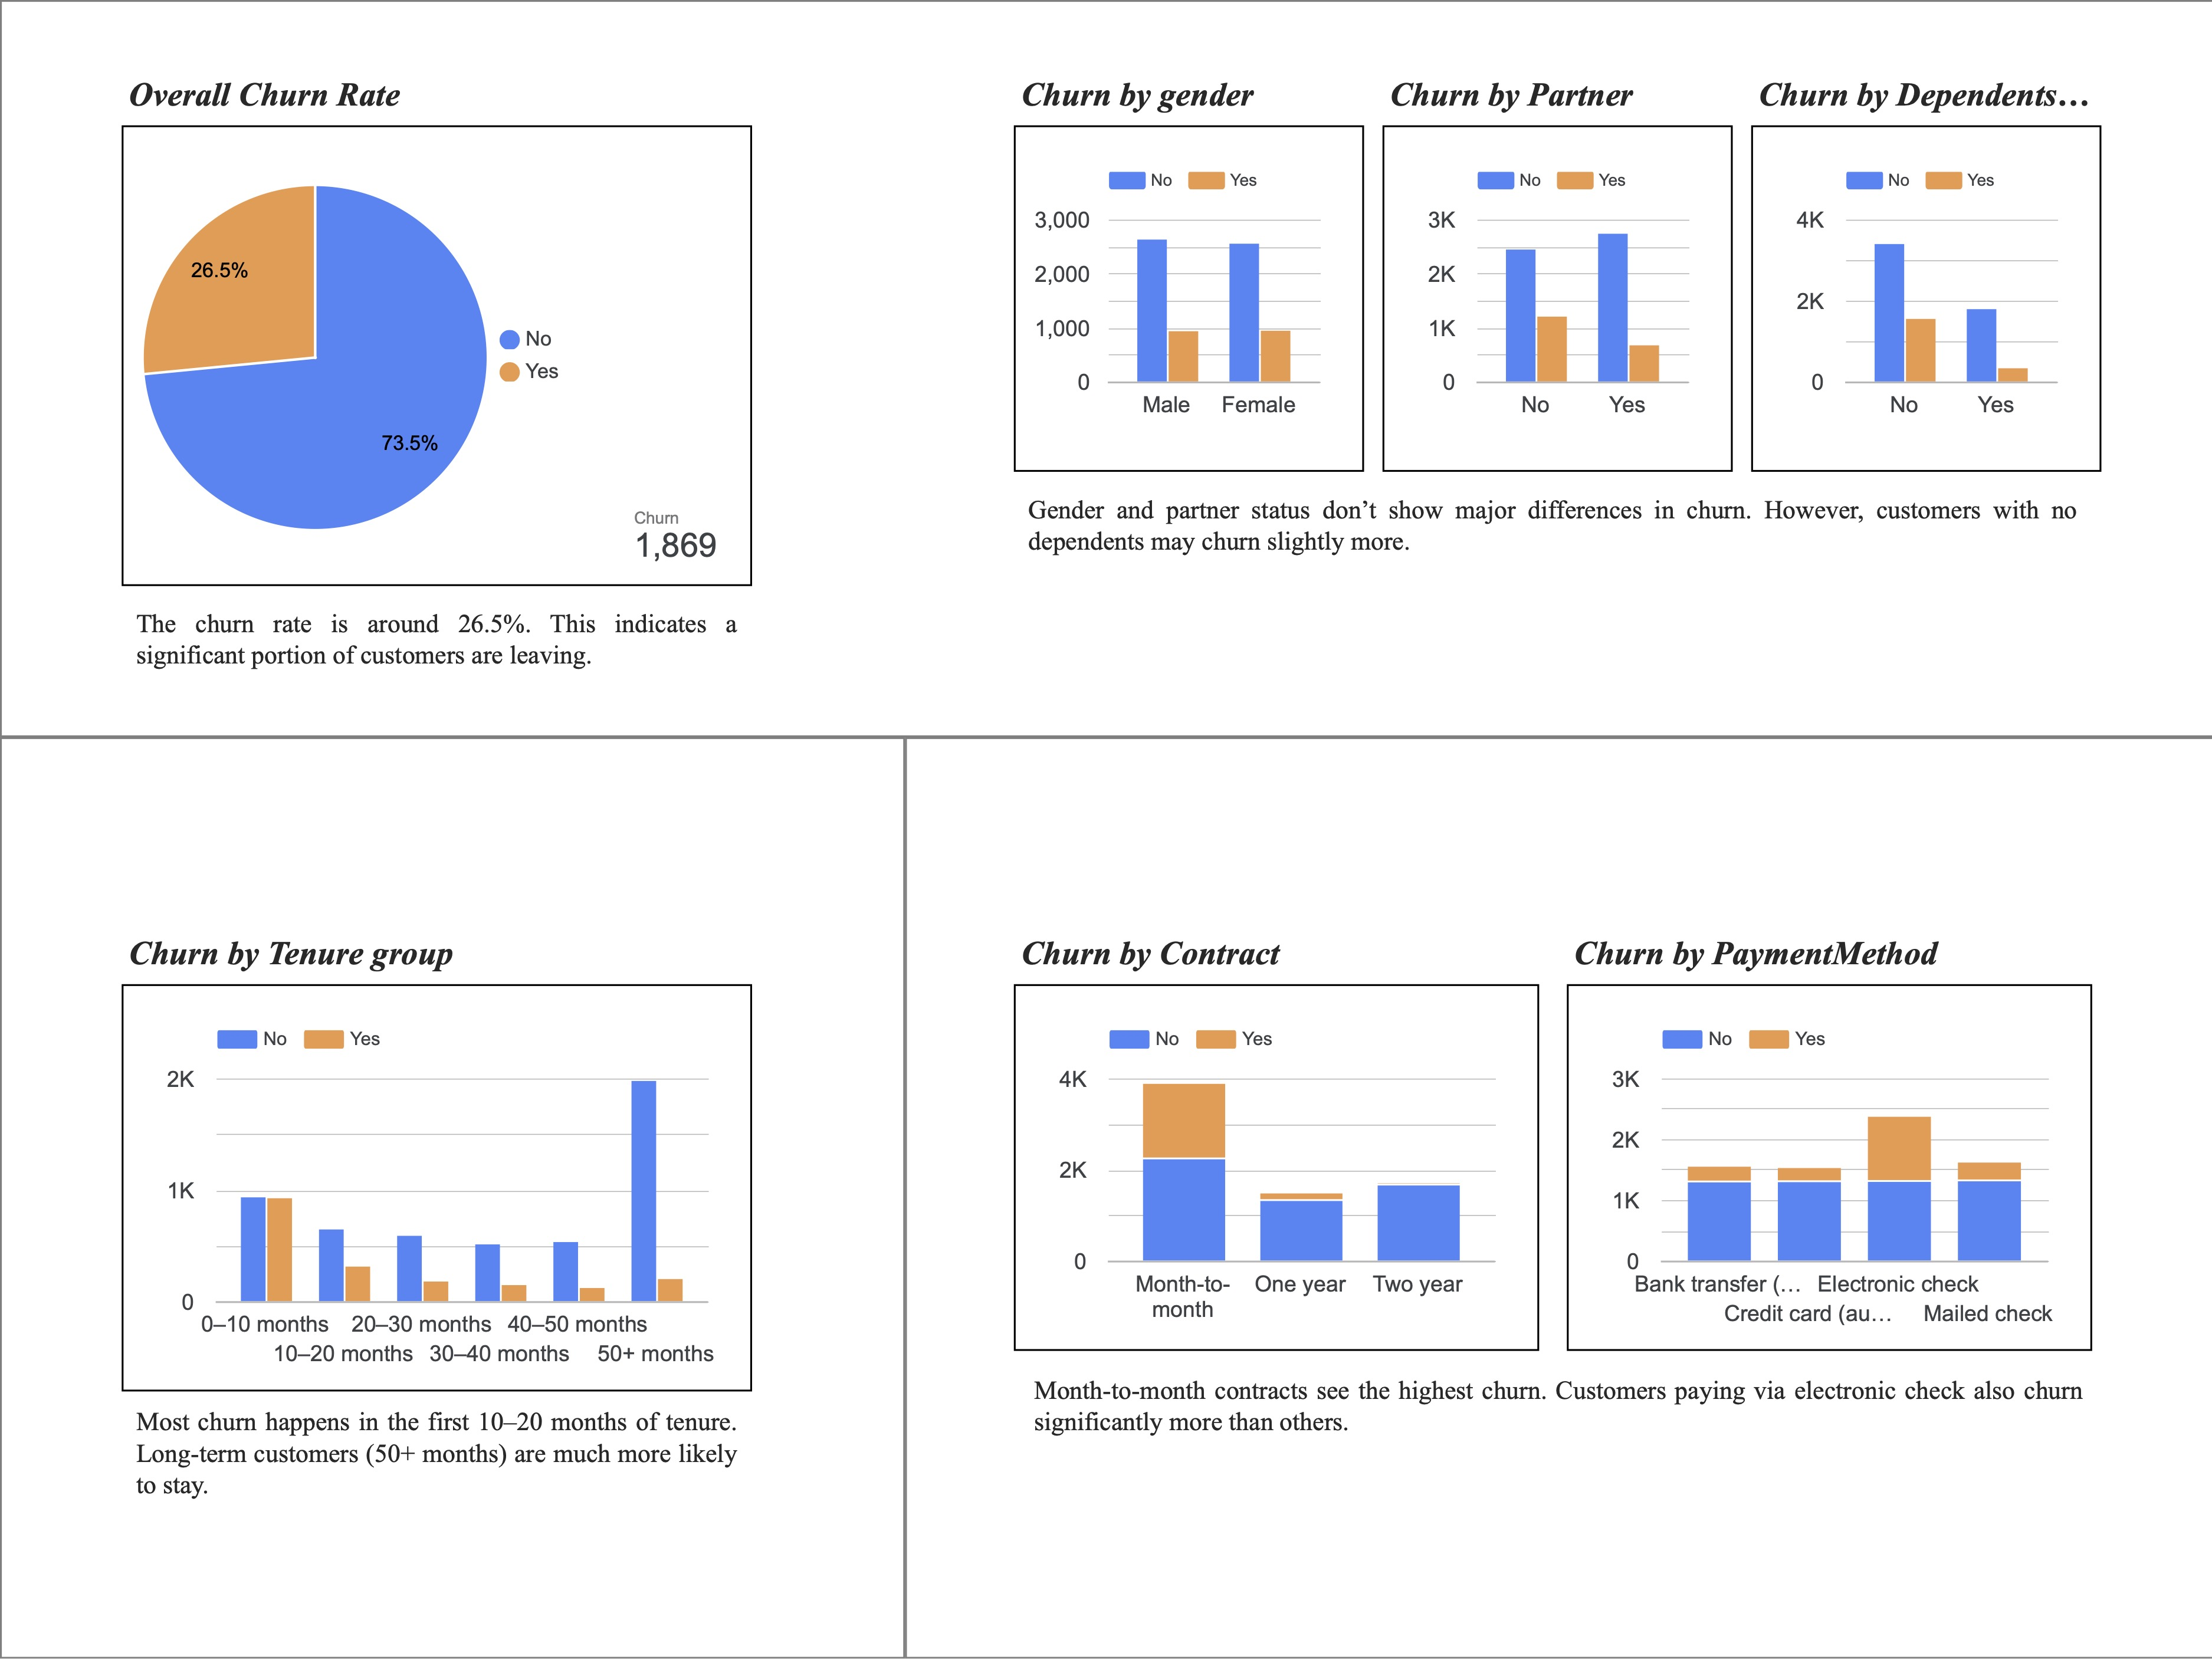

# Task 3 Churn Prediction Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


# Logistic Regression Predictions
y_pred_lr = lr.predict(X_test)

# Random Forest (Tuned) Predictions
y_pred_best = best_rf.predict(X_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'LogisticRegression': y_pred_lr,
    'RandomForest_Tuned': y_pred_best
})

# Reset index for easier viewing
comparison_df.reset_index(drop=True, inplace=True)

# Show first and last 10 predictions
print("\n1 = Customer will churn 0 = Customer will not churn")
print("\nFirst 10 predictions:\n", comparison_df.head(10))
print("\nLast 10 predictions:\n", comparison_df.tail(10))






/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.8031272210376688
Precision: 0.6465256797583081
Recall: 0.5721925133689839
F1 Score: 0.6070921985815603

Random Forest:
Accuracy: 0.7896233120113717
Precision: 0.6258064516129033
Recall: 0.5187165775401069
F1 Score: 0.5672514619883041

1 = Customer will churn 0 = Customer will not churn

First 10 predictions:
    Actual  LogisticRegression  RandomForest_Tuned
0       0                   0                   0
1       0                   1                   1
2       0                   0                   0
3       1                   0                   0
4       0                   0                   0
5       1                   0                   0
6       0                   0                   0
7       0                   0                   0
8       1                   1                   1
9       0                   0                   0

Last 10 predictions:
       Actual  LogisticRegression  RandomForest_Tuned
1397       0                  

**Feature Importance (Random Forest)**

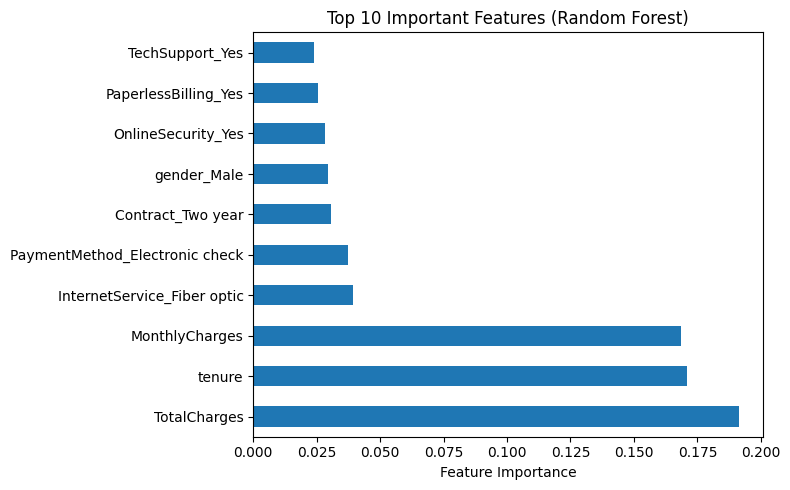

In [ ]:
# Feature Importance (Random Forest)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', figsize=(8, 5))
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


> **Random Forest** handles **non-linear relationships**, considers **feature interactions**, and gives **more reliable importance scores**.
>
> **Logistic Regression** provides coefficients, not true importance, and assumes **linear relationships**, making it less suitable for identifying key drivers in churn prediction.


**Hyperparameter Tuning for Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid,
                    scoring='f1', cv=3, n_jobs=-1)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best F1 Score (Cross-Validation):", grid.best_score_)

# Final evaluation
best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)

from sklearn.metrics import classification_report
print("Random Forest (Tuned) - Final Evaluation:\n")
print(classification_report(y_test, y_pred_best))




Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best F1 Score (Cross-Validation): 0.5798133474221313
Random Forest (Tuned) - Final Evaluation:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407

